# Introducción a Python y Pandas
### Notebook interactivo

**Objetivos de aprendizaje**:
- Introducir los fundamentos de programación en Python.
- Demostrar manipulación básica de datos con Pandas.
- Proporcionar explicaciones claras y ejercicios progresivos.

_Este cuaderno está pensado para abrirse en Google Colab o Jupyter._

## 1) ¿Qué es Python y qué es Pandas?

- **Python**: lenguaje de programación fácil de leer y muy usado en ciencia de datos, automatización y desarrollo web.
- **Pandas**: biblioteca de Python diseñada para manipular y analizar datos tabulares (como hojas de cálculo).

**Importancia en análisis de datos**:
- Permiten transformar datos crudos en información accionable.
- Usados para limpieza, análisis exploratorio y preparación de datos para modelos.

### Ejemplos reales y sencillos:
- Analizar ventas de una cafetería para decidir qué productos promover.
- Resumir comentarios de clientes por categorías.

En este notebook trabajaremos con un tema sencillo: **Ventas de una cafetería** (bebidas y pastelería).

## 2) Conceptos básicos de Python

Aquí veremos variables, tipos de datos y sintaxis básica.

In [1]:
# Ejemplo: declaración de variables y tipos de datos
nombre = "Café Central"            # string (texto)
numero_mesas = 12                   # entero (int)
promocion_activa = True             # booleano (True/False)
precio_promedio = 2.75              # flotante (decimal)

# Mostrar variables (comentarios explicativos en español)
print("Nombre del local:", nombre)   # imprime texto y variable
print("Número de mesas:", numero_mesas)
print("Promoción activa?:", promocion_activa)
print("Precio promedio:", precio_promedio)

Nombre del local: Café Central
Número de mesas: 12
Promoción activa?: True
Precio promedio: 2.75


### Tipos de datos comunes en Python
- `int` — enteros
- `float` — números con decimales
- `str` — cadenas de texto
- `bool` — verdadero/falso
- `list`, `tuple`, `dict` — colecciones

## 3) Introducción a Pandas y DataFrame

Un **DataFrame** es una estructura tabular (filas y columnas) — piensa en una hoja de cálculo.
Vamos a importar Pandas y crear un DataFrame de ejemplo.

In [2]:
# Importar Pandas
import pandas as pd

# Crear un DataFrame (ventas de una cafetería)
ventas = pd.DataFrame([
    {"fecha": "2025-09-01", "producto": "Café Americano", "categoria": "Bebida", "precio": 1.50, "cantidad": 30},
    {"fecha": "2025-09-01", "producto": "Latte", "categoria": "Bebida", "precio": 2.50, "cantidad": 20},
    {"fecha": "2025-09-01", "producto": "Croissant", "categoria": "Repostería", "precio": 1.75, "cantidad": 15},
    {"fecha": "2025-09-02", "producto": "Café Americano", "categoria": "Bebida", "precio": 1.50, "cantidad": 25},
    {"fecha": "2025-09-02", "producto": "Té Verde", "categoria": "Bebida", "precio": 1.25, "cantidad": 10},
    {"fecha": "2025-09-02", "producto": "Muffin", "categoria": "Repostería", "precio": 1.80, "cantidad": 12},
])

# Mostrar las primeras filas
ventas.head()  # .head() muestra las primeras filas del DataFrame

,fecha,producto,categoria,precio,cantidad
0,2025-09-01,Café Americano,Bebida,1.50,30
1,2025-09-01,Latte,Bebida,2.50,20
2,2025-09-01,Croissant,Repostería,1.75,15
3,2025-09-02,Café Americano,Bebida,1.50,25
4,2025-09-02,Té Verde,Bebida,1.25,10


### Explicación línea por línea


- `import pandas as pd`: importa la librería y le asigna el alias `pd`.
- `pd.DataFrame([...])`: crea un DataFrame a partir de una lista de diccionarios.
- Cada diccionario es una fila; las claves son los nombres de columnas.
- `.head()` muestra las primeras 5 filas.

## 4) Módulos guiados

### Módulo 1: Crear DataFrames (varias formas)
Veremos varias maneras de crear DataFrames: desde listas, diccionarios, CSV (simulado) y leyendo desde un diccionario anidado.

In [3]:
# 1) Desde una lista de diccionarios (ya visto arriba)
df_desde_lista = ventas.copy()
print("Creado desde lista/diccionarios — filas:", len(df_desde_lista))

# 2) Desde un diccionario de listas (cada clave es una columna)
datos = {
    "producto": ["Café Americano", "Latte", "Té Verde"],
    "categoria": ["Bebida", "Bebida", "Bebida"],
    "precio": [1.50, 2.50, 1.25]
}
df_dict_listas = pd.DataFrame(datos)
df_dict_listas


Creado desde lista/diccionarios — filas: 6


,producto,categoria,precio
0,Café Americano,Bebida,1.50
1,Latte,Bebida,2.50
2,Té Verde,Bebida,1.25


In [4]:
# 3) Desde un CSV simulado (usando StringIO) — útil para practicar lectura de archivos
from io import StringIO
csv_texto = """
fecha,producto,categoria,precio,cantidad
2025-09-03,Capuchino,Bebida,2.30,18
2025-09-03,Panini,Repostería,2.50,8
"""
df_csv = pd.read_csv(StringIO(csv_texto), parse_dates=["fecha"])  # parse_dates convierte a datetime
df_csv #usar dtypes

,fecha,producto,categoria,precio,cantidad
0,2025-09-03,Capuchino,Bebida,2.3,18
1,2025-09-03,Panini,Repostería,2.5,8


### Explicación línea por línea

- `pd.DataFrame(datos)` construye un DataFrame cuando pasamos un diccionario de listas.
- `pd.read_csv(...)` lee datos en formato CSV; en Colab normalmente leerás archivos subidos o desde Google Drive.
- `parse_dates=["fecha"]` intenta convertir esa columna a tipo fecha (datetime), lo cual facilita operaciones temporales.

### Módulo 2: Manipulación de datos
Operaciones comunes: filtrar, operaciones estadísticas, ordenar y agrupar.

In [5]:
# Vamos a usar el DataFrame 'ventas' creado previamente
ventas.info()  # muestra resumen (nombres de columnas y tipos)

# 1) Filtrar: ventas de categoría 'Bebida'
bebidas = ventas[ventas['categoria'] == 'Bebida']
print("Filtrado — solo Bebidas")
display(bebidas)

# 2) Operaciones estadísticas: sumar ingresos por fila y describir
ventas['ingreso'] = ventas['precio'] * ventas['cantidad']  # nueva columna: ingreso
print("Descripción estadística de ingresos:")
display(ventas['ingreso'].describe())

# 3) Ordenar: productos por ingreso descendente
por_ingreso = ventas.sort_values('ingreso', ascending=False)
display(por_ingreso)

# 4) Agrupar: total de ingresos por producto
ingreso_por_producto = ventas.groupby('producto', as_index=False)['ingreso'].sum()
ingreso_por_producto

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   fecha      6 non-null      object 
 1   producto   6 non-null      object 
 2   categoria  6 non-null      object 
 3   precio     6 non-null      float64
 4   cantidad   6 non-null      int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 372.0+ bytes
Filtrado — solo Bebidas


,fecha,producto,categoria,precio,cantidad
0,2025-09-01,Café Americano,Bebida,1.50,30
1,2025-09-01,Latte,Bebida,2.50,20
3,2025-09-02,Café Americano,Bebida,1.50,25
4,2025-09-02,Té Verde,Bebida,1.25,10


Descripción estadística de ingresos:


,ingreso
count,6.000000
mean,32.141667
std,14.454080
min,12.500000
25%,22.762500
50%,31.875000
75%,43.125000
max,50.000000


,fecha,producto,categoria,precio,cantidad,ingreso
1,2025-09-01,Latte,Bebida,2.50,20,50.00
0,2025-09-01,Café Americano,Bebida,1.50,30,45.00
3,2025-09-02,Café Americano,Bebida,1.50,25,37.50
2,2025-09-01,Croissant,Repostería,1.75,15,26.25
5,2025-09-02,Muffin,Repostería,1.80,12,21.60
4,2025-09-02,Té Verde,Bebida,1.25,10,12.50


,producto,ingreso
0,Café Americano,82.50
1,Croissant,26.25
2,Latte,50.00
3,Muffin,21.60
4,Té Verde,12.50


#### Explicación de operaciones
- `ventas[ventas['categoria'] == 'Bebida']`: selección booleana — devuelve filas que cumplen la condición.
- `ventas['ingreso'] = ...`: crear una nueva columna (operación vectorizada, rápida).
- `.describe()`: devuelve estadísticas (count, mean, std, min, max, percentiles).
- `.sort_values(column)`: ordena por una columna.
- `.groupby('col').agg(...)` o `.groupby(...)[col].sum()` agrupa y agrega.

## 5) Ejercicios interactivos

Los ejercicios incluyen celdas con código **parcial** que debéis completar. Se incluye una celda de auto-comprobación (tests simples con `assert`) que dará retroalimentación inmediata.

### Ejercicio 1 — Creación de DataFrame
Completa el código para crear un DataFrame llamado `df_estudiantes` con columnas: `nombre`, `edad`, `curso`.
Rellena el TODO en la celda de código siguiente.

In [6]:
# EJERCICIO 1: completa las partes marcadas con TODO
import pandas as pd

# >>>> INICIO - EDITA AQUÍ <<<<
df_estudiantes = pd.DataFrame([
    {"nombre": "Carlos", "edad": 24, "curso": "1ºA" },
    {"nombre": "Marta", "edad": 28, "curso": "3ºC" },
    {"nombre": "Sergio", "edad": 23, "curso": "1ºA" },
])
# >>>> FIN - EDITA AQUÍ <<<<

# Mostrar el DataFrame (no modificar esta línea)
df_estudiantes

,nombre,edad,curso
0,Carlos,24,1ºA
1,Marta,28,3ºC
2,Sergio,23,1ºA


In [7]:
# Auto-comprobación para Ejercicio 1
try:
    assert 'df_estudiantes' in globals(), "No encontré la variable df_estudiantes. ¿La creaste?"
    assert set(df_estudiantes.columns) == {'nombre', 'edad', 'curso'}, "Las columnas no coinciden. Revísalas."
    assert len(df_estudiantes) == 3, "¿Cuántas filas debería tener? Debería tener 3."
    print('✅ Ejercicio 1 completado correctamente. ¡Bien hecho!')
except AssertionError as e:
    print('❌ Auto-comprobación falló: ', e)
    print('\nPista: revisa la estructura del diccionario que pasaste a pd.DataFrame.')

✅ Ejercicio 1 completado correctamente. ¡Bien hecho!


### Ejercicio 2 — Desafío de análisis de datos
Tienes el pequeño conjunto `ventas_desafio`. Realiza las siguientes tareas:
1. Crear una columna `ingreso` = `precio` * `cantidad`.
2. Filtrar las ventas del día `2025-09-02` y guardarlas en `ventas_0902`.
3. Calcular el total de ingreso por categoría y guardarlo en `total_por_categoria`.

Completa los TODO en la celda siguiente. Después ejecuta la celda de auto-comprobación.

In [8]:
# Datos del desafío (no modificar el nombre 'ventas_desafio')
ventas_desafio = pd.DataFrame([
    {"fecha": "2025-09-01", "producto": "Café Americano", "categoria": "Bebida", "precio": 1.50, "cantidad": 30},
    {"fecha": "2025-09-02", "producto": "Latte", "categoria": "Bebida", "precio": 2.50, "cantidad": 20},
    {"fecha": "2025-09-02", "producto": "Muffin", "categoria": "Repostería", "precio": 1.80, "cantidad": 12},
    {"fecha": "2025-09-03", "producto": "Té Verde", "categoria": "Bebida", "precio": 1.25, "cantidad": 10},
])

# >>>> INICIO - completa los TODO <<<<
ventas_desafio['ingreso'] = ventas_desafio['precio'] * ventas_desafio['cantidad']
ventas_0902 = ventas_desafio[ventas_desafio['fecha'] == "2025-09-02"]
total_por_categoria = ventas_desafio.groupby('categoria', as_index=False)['cantidad'].sum()
# >>>> FIN - completa los TODO <<<<

# Mostrar resultados
ventas_desafio, ventas_0902, total_por_categoria

(        fecha        producto   categoria  precio  cantidad  ingreso
 0  2025-09-01  Café Americano      Bebida    1.50        30     45.0
 1  2025-09-02           Latte      Bebida    2.50        20     50.0
 2  2025-09-02          Muffin  Repostería    1.80        12     21.6
 3  2025-09-03        Té Verde      Bebida    1.25        10     12.5,
         fecha producto   categoria  precio  cantidad  ingreso
 1  2025-09-02    Latte      Bebida     2.5        20     50.0
 2  2025-09-02   Muffin  Repostería     1.8        12     21.6,
     categoria  cantidad
 0      Bebida        60
 1  Repostería        12)

In [9]:
# Auto-comprobación para Ejercicio 2
try:
    # 1) ingreso existe y es correcto
    assert 'ingreso' in ventas_desafio.columns, "Falta la columna 'ingreso'."
    # comprobar un cálculo (fila 0)
    assert abs(ventas_desafio.loc[0,'ingreso'] - (1.50*30)) < 1e-9, "El cálculo de 'ingreso' parece incorrecto."
    # 2) ventas_0902 tiene solo fecha 2025-09-02
    assert set(ventas_0902['fecha']) == {'2025-09-02'}, "ventas_0902 debería contener solo la fecha 2025-09-02."
    # 3) total_por_categoria contiene las categorías correctas
    assert 'Repostería' in list(total_por_categoria['categoria']), "Falta la categoría 'Repostería' en el resultado final."
    print('✅ Ejercicio 2: ¡Correcto!')
except AssertionError as e:
    print('❌ Auto-comprobación falló: ', e)
    print('\nPista: revisa las operaciones vectorizadas y el uso de groupby().')

✅ Ejercicio 2: ¡Correcto!


## 6) Verificación del aprendizaje y buenas prácticas

- Cada bloque de código incluye comentarios explicando qué hace y por qué.
- Usamos `assert` para crear pruebas simples que ayudan a recibir retroalimentación inmediata.

### Consejos sobre manejo de errores (error handling)
- Cuando intentes leer un archivo, usa `try/except` para capturar errores y mostrar mensajes claros.
```python
try:
    df = pd.read_csv('mi_archivo.csv')
except FileNotFoundError:
    print('No encontré el archivo. Revisa la ruta o sube el archivo a Colab.')
```
- Si una columna no existe, usa `if 'col' in df.columns:` antes de operar.

### Atajos para depuración
- `df.head()` para ver las primeras filas.
- `df.info()` para ver tipos y nulos.
- `df.describe()` para estadísticas rápidas.

## 7) Pistas y ayudas para secciones complejas

<details>
<summary>Hint: ¿Cómo funciona groupby()? (haz clic)</summary>

`groupby` agrupa filas según valores de una o varias columnas y permite aplicar funciones de agregación (sum, mean, count, etc.). Por ejemplo:
```python
df.groupby('categoria')['precio'].mean()
```
agrupa por `categoria` y calcula la media de `precio` en cada grupo.

</details>

Más pistas están colocadas junto a los ejercicios.

## 8) Recursos adicionales recomendados (en español e inglés)
- Documentación oficial de Pandas: https://pandas.pydata.org/docs/user_guide/index.html
- Practica en Kaggle: datasets y notebooks.


# **Introducción a Pandas con el dataset de Netflix**
En esta parte trabajaremos con un **dataset real de Netflix**, que contiene información sobre películas y series disponibles en la plataforma.

Al final de la práctica podrás:
- Cargar y explorar un dataset con Pandas  
- Entender la estructura de un DataFrame  
- Limpiar datos faltantes  
- Filtrar, ordenar y agrupar información  
- Crear pequeños gráficos para visualizar datos  

¡Vamos paso a paso!


## 1) Importar librerías y cargar los datos

Primero, importaremos la librería `pandas` como ya hemos visto anteriormente y leeremos un archivo CSV desde internet con información de títulos de Netflix.


In [10]:
import pandas as pd

# Cargamos el dataset desde una URL pública
url = "https://raw.githubusercontent.com/amirtds/kaggle-netflix-tv-shows-and-movies/refs/heads/main/titles.csv"
netflix = pd.read_csv(url)

# Mostramos las primeras filas
netflix.head()


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0,18.216,7.8
3,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0,17.505,7.8
4,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0,95.337,7.7


### Explicación

- `import pandas as pd` → importa la librería Pandas y le damos el alias **pd**, que es la convención habitual.
- `pd.read_csv(url)` → lee un archivo CSV (valores separados por comas) desde una URL o ruta local.
- `netflix.head()` → muestra las **primeras 5 filas** del DataFrame, útil para inspeccionar cómo se ven los datos.


## 2) Primer vistazo al DataFrame

Queremos saber:
- Cuántas filas y columnas tiene
- Qué columnas contiene
- Qué tipo de información hay dentro


In [11]:
# Tamaño del DataFrame
print(netflix.shape)

# Nombres de las columnas
print(netflix.columns)


(5806, 15)
Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')


### Explicación

- `.shape` → devuelve una tupla `(filas, columnas)` con el tamaño del DataFrame.  
- `.columns` → lista con los **nombres de todas las columnas**, útil para saber qué información hay disponible.


### Información general y tipos de datos


In [12]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5806 entries, 0 to 5805
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5806 non-null   object 
 1   title                 5805 non-null   object 
 2   type                  5806 non-null   object 
 3   description           5788 non-null   object 
 4   release_year          5806 non-null   int64  
 5   age_certification     3196 non-null   object 
 6   runtime               5806 non-null   int64  
 7   genres                5806 non-null   object 
 8   production_countries  5806 non-null   object 
 9   seasons               2047 non-null   float64
 10  imdb_id               5362 non-null   object 
 11  imdb_score            5283 non-null   float64
 12  imdb_votes            5267 non-null   float64
 13  tmdb_popularity       5712 non-null   float64
 14  tmdb_score            5488 non-null   float64
dtypes: float64(5), int64(

### Explicación

- `.info()` → muestra un resumen del DataFrame:
  - Número de filas y columnas
  - Tipo de dato en cada columna (por ejemplo: `object`, `int64`, `float64`)
  - Cuántos valores no nulos tiene cada columna  
- Sirve para detectar columnas con **valores faltantes** o tipos incorrectos.


### Resumen estadístico
Como ya hemos visto anteriormente, con `describe()` podemos ver estadísticas básicas de las columnas.  
Usamos `include='all'` para incluir también las de texto.


In [13]:
netflix.describe(include='all')


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,5806,5805,5806,5788,5806.000000,3196,5806.000000,5806,5806,2047.000000,5362,5283.000000,5.267000e+03,5712.000000,5488.000000
unique,5806,5751,2,5785,NaN,11,NaN,1626,449,NaN,5362,NaN,NaN,NaN,NaN
top,ts271048,Connected,MOVIE,Five families struggle with the ups and downs ...,NaN,TV-MA,NaN,['comedy'],['US'],NaN,tt13711094,NaN,NaN,NaN,NaN
freq,1,3,3759,2,NaN,841,NaN,510,1950,NaN,1,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,2016.013434,NaN,77.643989,NaN,NaN,2.165608,NaN,6.533447,2.340719e+04,22.525660,6.818039
std,NaN,NaN,NaN,NaN,7.324883,NaN,39.474160,NaN,NaN,2.636207,NaN,1.160932,8.713432e+04,68.849177,1.171560
min,NaN,NaN,NaN,NaN,1945.000000,NaN,0.000000,NaN,NaN,1.000000,NaN,1.500000,5.000000e+00,0.009442,0.500000
25%,NaN,NaN,NaN,NaN,2015.000000,NaN,44.000000,NaN,NaN,1.000000,NaN,5.800000,5.210000e+02,3.155250,6.100000
50%,NaN,NaN,NaN,NaN,2018.000000,NaN,84.000000,NaN,NaN,1.000000,NaN,6.600000,2.279000e+03,7.478000,6.900000
75%,NaN,NaN,NaN,NaN,2020.000000,NaN,105.000000,NaN,NaN,2.000000,NaN,7.400000,1.014400e+04,17.775750,7.500000


### Explicación

- `.describe()` → calcula estadísticas básicas de las columnas numéricas (media, máximo, mínimo, etc.).
- Si usamos `include='all'`, también muestra estadísticas para columnas de texto:
  - Número de valores únicos
  - Valor más frecuente (top)
  - Frecuencia de ese valor


## 3) Accediendo a columnas y filas

Vamos a aprender cómo acceder a partes concretas del DataFrame: columnas o filas específicas.

In [14]:
# Ver solo la columna de títulos
netflix["title"].head(10)

,title
0,Five Came Back: The Reference Films
1,Taxi Driver
2,Monty Python and the Holy Grail
3,Life of Brian
4,The Exorcist
5,Monty Python's Flying Circus
6,Dirty Harry
7,My Fair Lady
8,The Blue Lagoon
9,Bonnie and Clyde


### Explicación

- `netflix["title"]` → accede a la columna `title`.  
- `.head(10)` → muestra las primeras 10 filas de esa columna.


In [15]:
# Seleccionar varias columnas
netflix[["title", "type", "release_year"]].head()


,title,type,release_year
0,Five Came Back: The Reference Films,SHOW,1945
1,Taxi Driver,MOVIE,1976
2,Monty Python and the Holy Grail,MOVIE,1975
3,Life of Brian,MOVIE,1979
4,The Exorcist,MOVIE,1973


### Explicación

- `netflix[["col1", "col2"]]` → selecciona varias columnas pasando una lista.  
Es útil cuando solo queremos mostrar ciertas columnas relevantes.


In [16]:
# Acceder a una fila específica
netflix.loc[0]


,0
id,ts300399
title,Five Came Back: The Reference Films
type,SHOW
description,This collection includes 12 World War II-era p...
release_year,1945
age_certification,TV-MA
runtime,48
genres,['documentation']
production_countries,['US']
seasons,1.0


### Explicación

- `.loc[]` → selecciona filas **por etiqueta** (nombre del índice o fila).  
Aquí accedemos a la fila con índice 0 (la primera).


In [17]:
# Acceder por posición
netflix.iloc[5:10]


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
5,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,"['comedy', 'european']",['GB'],4.0,tt0063929,8.8,72895.0,12.919,8.3
6,tm14873,Dirty Harry,MOVIE,When a madman dubbed 'Scorpio' terrorizes San ...,1971,R,102,"['thriller', 'crime', 'action']",['US'],NaN,tt0066999,7.7,153463.0,14.745,7.5
7,tm185072,My Fair Lady,MOVIE,A snobbish phonetics professor agrees to a wag...,1964,G,170,"['drama', 'music', 'romance', 'family']",['US'],NaN,tt0058385,7.8,94121.0,15.949,7.6
8,tm98978,The Blue Lagoon,MOVIE,Two small children and a ship's cook survive a...,1980,R,104,"['romance', 'drama']",['US'],NaN,tt0080453,5.8,69053.0,44.038,6.2
9,tm119281,Bonnie and Clyde,MOVIE,"In the 1930s, bored waitress Bonnie Parker fal...",1967,R,110,"['drama', 'crime', 'action']",['US'],NaN,tt0061418,7.7,111189.0,15.309,7.5


### Explicación

- `.iloc[]` → selecciona filas **por posición**.  
`5:10` muestra las filas desde la 5 hasta la 9 (Python excluye la última posición).


## 4) Limpiar datos faltantes

En los datasets reales es común tener valores nulos o vacíos.
Vamos a identificarlos y limpiarlos.


In [18]:
# Contar valores nulos en cada columna
netflix.isna().sum()


,0
id,0
title,1
type,0
description,18
release_year,0
age_certification,2610
runtime,0
genres,0
production_countries,0
seasons,3759


### Explicación

- `.isna()` → devuelve un DataFrame de valores booleanos (`True` si el valor es nulo).  
- `.sum()` → cuenta cuántos `True` hay por columna (es decir, cuántos nulos).


In [19]:
# Eliminar filas sin título
netflix = netflix.dropna(subset=['title'])


### Explicación

- `.dropna(subset=['columna'])` → elimina las filas que tengan valores nulos en la columna especificada.
Aquí eliminamos filas sin `title`.


In [20]:
# Rellenar valores nulos en 'production_countries'
netflix['production_countries'] = netflix['production_countries'].fillna('Desconocido')


### Explicación

- `.fillna(valor)` → reemplaza los valores nulos por un valor que indiquemos.  
Aquí usamos la palabra `'Desconocido'` para completar los países vacíos.


## 5) Filtrar filas según condiciones

Podemos seleccionar solo las filas que cumplan ciertas condiciones.


In [21]:
# Solo películas
peliculas = netflix[netflix["type"] == "MOVIE"]
peliculas.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0,18.216,7.8
3,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0,17.505,7.8
4,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0,95.337,7.7
6,tm14873,Dirty Harry,MOVIE,When a madman dubbed 'Scorpio' terrorizes San ...,1971,R,102,"['thriller', 'crime', 'action']",['US'],NaN,tt0066999,7.7,153463.0,14.745,7.5


### Explicación

- `netflix["type"] == "MOVIE"` → genera una serie de valores `True`/`False`  
- `netflix[condición]` → muestra solo las filas donde la condición es `True`.  
Así filtramos solo las películas.


In [22]:
# Series estrenadas después de 2018
series_recientes = netflix[(netflix["type"] == "SHOW") & (netflix["release_year"] > 2018)]
series_recientes.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
3178,ts86497,Russian Doll,SHOW,Nadia keeps dying and reliving her 36th birthd...,2019,TV-MA,28,"['drama', 'comedy']",['US'],2.0,tt7520794,7.8,88945.0,31.225,7.6
3180,ts216679,Bridgerton,SHOW,"Wealth, lust, and betrayal set in the backdrop...",2020,TV-MA,62,"['drama', 'romance']",['US'],4.0,tt8740790,7.3,122036.0,206.258,8.2
3181,ts87466,Demon Slayer: Kimetsu no Yaiba,SHOW,"It is the Taisho Period in Japan. Tanjiro, a k...",2019,TV-MA,25,"['animation', 'scifi', 'action', 'fantasy', 't...",['JP'],3.0,tt9335498,8.7,88265.0,131.109,8.8
3182,ts82915,Sex Education,SHOW,Inexperienced Otis channels his sex therapist ...,2019,TV-MA,52,"['drama', 'comedy']",['GB'],4.0,tt7767422,8.3,251168.0,309.755,8.4
3183,ts81007,After Life,SHOW,Tony had a perfect life. But after his wife Li...,2019,TV-MA,28,"['comedy', 'drama']",['GB'],3.0,tt8398600,8.5,124972.0,18.619,7.9


### Explicación

- Usamos `&` para combinar condiciones (AND lógico).  
- `|` serviría para combinar con OR.  
Esta línea filtra las series (`type == 'SHOW'`) estrenadas después de 2018.


## 6) Ordenar el DataFrame

Podemos ordenar los datos por año de estreno o por cualquier otra columna.


In [23]:
# Películas más recientes primero
peliculas.sort_values("release_year", ascending=False).head(10)


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
4843,tm1120543,The Bubble,MOVIE,A group of actors and actresses stuck inside a...,2022,R,126,['comedy'],['US'],NaN,tt13610562,4.7,20080.0,250.543,4.9
4844,tm1185367,White Hot: The Rise & Fall of Abercrombie & Fitch,MOVIE,All the cool kids were wearing it. This docume...,2022,R,88,['documentation'],['US'],NaN,tt19034522,5.6,1184.0,10.804,5.7
4848,tm1083293,Windfall,MOVIE,A man breaks into a tech billionaire's empty v...,2022,R,92,"['thriller', 'crime', 'drama']",['US'],NaN,tt15035360,5.7,17218.0,133.608,5.3
4857,tm852172,Apollo 10½: A Space Age Childhood,MOVIE,A man narrates stories of his life as a 10-yea...,2022,PG-13,98,"['comedy', 'action', 'animation', 'romance', '...","['NL', 'US']",NaN,tt7978758,7.3,4932.0,12.340,7.1
4882,tm1196288,Our Father,MOVIE,After a woman's at-home DNA test reveals multi...,2022,NaN,97,['crime'],['US'],NaN,NaN,NaN,NaN,48.759,6.1
4883,tm1014947,Against the Ice,MOVIE,"In 1909, two explorers fight to survive after ...",2022,NaN,102,"['drama', 'history']","['DK', 'IS']",NaN,tt13873302,6.5,18057.0,190.822,6.8
4885,tm1185421,David Spade: Nothing Personal,MOVIE,David Spade riffs on the humiliations of docto...,2022,NaN,66,['comedy'],[],NaN,tt18955474,NaN,NaN,21.464,7.0
4889,tm1142224,The House,MOVIE,"""The House"" is an eccentric dark comedy direct...",2022,R,97,"['animation', 'drama', 'comedy', 'thriller']",['GB'],NaN,tt11703050,6.8,12270.0,8.347,7.0
4890,tm1185360,Return to Space,MOVIE,The inspirational rise of SpaceX as well as El...,2022,NaN,128,['documentation'],['US'],NaN,tt18555320,7.3,3270.0,35.747,6.3
4891,tm1165983,The Weekend Away,MOVIE,When her best friend vanishes during a girls' ...,2022,NaN,91,"['thriller', 'crime', 'drama']",['GB'],NaN,tt14817272,5.6,20207.0,293.216,5.9


### Explicación

- `.sort_values("columna")` → ordena las filas según los valores de una columna.  
- `ascending=False` → de mayor a menor.  
Si pones `ascending=True`, será de menor a mayor.


## 7) Agrupar y contar información

Podemos agrupar los datos para ver resúmenes, como cuántas películas hay por país o por año.


In [24]:
# Títulos por país
netflix.groupby("production_countries")["title"].count().sort_values(ascending=False).head(10)

,title
production_countries,
['US'],1950
['IN'],605
['JP'],266
[],231
['GB'],219
['KR'],210
['ES'],159
['FR'],124
['CA'],103


### Explicación

- `.groupby("columna")` → agrupa las filas por valores únicos de esa columna.  
- `["title"].count()` → cuenta cuántos títulos hay en cada grupo.  
- `.sort_values()` → ordena el resultado para ver los más altos primero.


In [25]:
# Títulos por tipo
netflix["type"].value_counts()


,count
type,
MOVIE,3758
SHOW,2047


### Explicación

- `.value_counts()` → cuenta cuántas veces aparece cada valor único en una columna.  
Sirve para saber si hay más películas o series.


## 8) Visualización de datos

Podemos crear gráficos sencillos directamente desde Pandas.


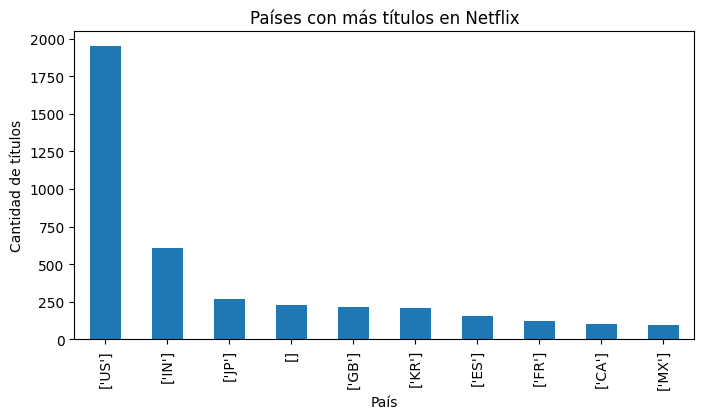

In [26]:
import matplotlib.pyplot as plt

netflix["production_countries"].value_counts().head(10).plot(kind="bar", figsize=(8,4))
plt.title("Países con más títulos en Netflix")
plt.xlabel("País")
plt.ylabel("Cantidad de títulos")
plt.show()

### Explicación

- `.plot(kind="bar")` → crea un gráfico de barras.  
- `figsize` → tamaño de la figura.  
- `plt.title()`, `plt.xlabel()`, `plt.ylabel()` → añaden título y etiquetas.  
- `plt.show()` → muestra el gráfico.  
Así visualizamos qué países producen más contenido en Netflix.


# 9) Trabajo evaluable – Análisis de datos con Pandas

En esta unidad realizaremos **dos trabajos prácticos**.  
Este será el **primero** y tendrá un **peso del 40 % sobre la nota de la Unidad de Trabajo 1 (UT)**.

El objetivo es aplicar los conocimientos adquiridos sobre **análisis y manipulación de datos con Pandas**, utilizando un conjunto de datos real de producciones de Netflix.  

Cada bloque de ejercicios tiene un valor parcial dentro de ese 40 %.  
El **Bloque 6** es opcional y permitirá obtener hasta **+5 % adicional**, alcanzando un máximo del **45 % de la nota de la unidad**.

---

## Criterios de evaluación

- Se valorará la **claridad del código**, la **organización del notebook** y la **interpretación de resultados**.  
- Cada bloque debe estar correctamente **comentado** y acompañado de una breve **explicación o conclusión**.  
- No se evaluará solo el resultado, sino la **capacidad de razonamiento y análisis** mostrada en el proceso.

---

## Bloque 1 – Exploración inicial del dataset (10 %)

1. **Carga y exploración básica.**  
   Explica qué información contiene el dataset, cuántas filas y columnas tiene, y qué representa cada una.  
   *(3 %)*  

2. **Tipos de producciones.**  
   Calcula cuántos títulos hay de cada tipo (por ejemplo, películas o series) e interpreta el resultado.  
   *(3 %)*  

3. **Producciones recientes.**  
   Muestra las diez producciones más recientes junto con su país y año de estreno.  
   *(2 %)*  

4. **Producción más antigua.**  
   Indica cuál es la producción más antigua registrada y comenta si el dato parece coherente.  
   *(2 %)*  

---

## Bloque 2 – Filtrado y selección de información (8 %)

5. **Filtro por año.**  
   Muestra las producciones estrenadas en el año 2020 y cuenta cuántas hay.  
   *(2 %)*  

6. **Filtro por director.**  
   Muestra todas las producciones dirigidas por *Steven Spielberg* (si aparece en el dataset).  
   *(2 %)*  

7. **Filtro por palabra clave.**  
   Crea un nuevo DataFrame con los títulos que contengan la palabra *Love* o *Amor*.  
   *(2 %)*  

8. **Filtro por país.**  
   Calcula qué porcentaje del total del catálogo corresponde a producciones de Estados Unidos.  
   *(2 %)*  

---

## Bloque 3 – Análisis descriptivo y agrupaciones (9 %)

9. **Duraciones más largas.**  
   Muestra las cinco producciones con mayor duración e interpreta el resultado.  
   *(3 %)*  

10. **Producción por país.**  
    Identifica los cinco países con más títulos producidos y ordénalos de mayor a menor.  
    *(3 %)*  

11. **Producción por año.**  
    Indica qué año tiene más estrenos y cuántos títulos se publicaron en ese periodo.  
    *(3 %)*  

---

## Bloque 4 – Visualización y análisis avanzado (8 %)

12. **Evolución de estrenos.**  
    Representa mediante un gráfico la evolución del número de títulos a lo largo de los años.  
    *(3 %)*  

13. **Producción por país.**  
    Crea un gráfico de barras con los diez países que más títulos han producido.  
    *(2 %)*  

14. **Décadas.**  
    Añade una nueva columna llamada *“década”* que agrupe los años de estreno (por ejemplo, 1990, 2000, 2010...)  
    y analiza qué década concentra más estrenos.  
    *(2 %)*  

15. **Películas y series por año.**  
    Crea una visualización que compare el número de películas y series por año.  
    *(1 %)*  

---

## Bloque 5 – Análisis temático y síntesis (5 %)

16. **Género terror/horror.**  
    Busca todas las producciones de género *terror* o *horror* y analiza cuál es la más reciente y de qué país procede.  
    *(2 %)*  

17. **Colaboraciones internacionales.**  
    Calcula cuántas producciones fueron realizadas en más de un país.  
    *(1 %)*  

18. **Director más frecuente.**  
    Indica qué director aparece con mayor frecuencia en el conjunto de datos.  
    *(1 %)*  

19. **Géneros predominantes.**  
    Analiza cuáles son los géneros más comunes y en qué tipo de producción predominan.  
    *(1 %)*  

---

## Bloque 6 – Ejercicio de análisis personal (opcional – hasta +5 %)

Este bloque es opcional y permitirá **aumentar hasta +5 % la nota de la unidad** (máximo 45 %).  
Se valorará especialmente la **originalidad**, la **limpieza del código** y la **claridad de las conclusiones**.

20. Realiza un análisis libre a partir del dataset. Puedes elegir cualquier enfoque que te interese.  
   Algunas ideas posibles:  
   - ¿Cuál es el título más largo o más corto del conjunto de datos?  
   - ¿Existen títulos repetidos?  
   - ¿Qué país produce más comedias o dramas?  
   - ¿Hay algún patrón interesante en los años de estreno o en los géneros?  
   - ¿Qué actores o directores aparecen con más frecuencia en determinadas décadas?  

---

### Recomendaciones finales

- Comprueba si existen valores nulos antes de analizar cada columna.  
- Presenta el trabajo en un notebook ordenado, con celdas de texto explicativas y conclusiones breves.  
- Los gráficos deben acompañarse siempre de una interpretación.  
- Cuida la claridad visual y el formato: el documento debe poder leerse como un pequeño informe.

**Importante:**  

Este trabajo representa el **40 % de la nota de la unidad didáctica**, con la posibilidad de alcanzar **hasta el 45 %** gracias al bloque 6 opcional.





1. Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5806 entries, 0 to 5805
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5806 non-null   object 
 1   title                 5805 non-null   object 
 2   type                  5806 non-null   object 
 3   description           5788 non-null   object 
 4   release_year          5806 non-null   int64  
 5   age_certification     3196 non-null   object 
 6   runtime               5806 non-null   int64  
 7   genres                5806 non-null   object 
 8   production_countries  5806 non-null   object 
 9   seasons               2047 non-null   float64
 10  imdb_id               5362 non-null   object 
 11  imdb_score            5283 non-null   float64
 12  imdb_votes            5267 non-null   float64
 13  tmdb_popularity       5712 non-null   float64
 14  tmdb_score            5488 non-null   floa

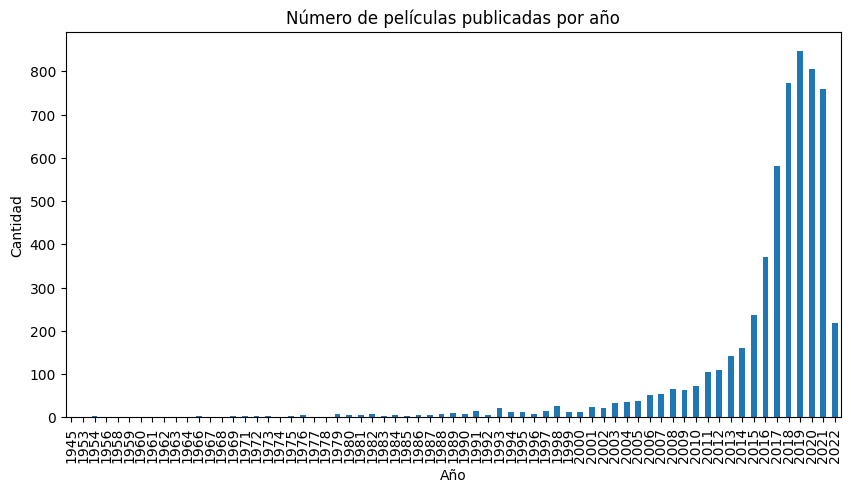

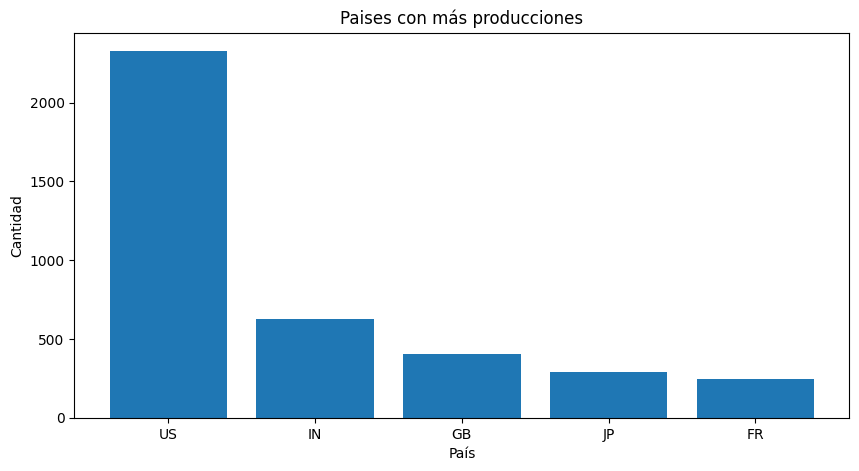



14. La década con más estrenos fue la de 2010 con un total de 3399


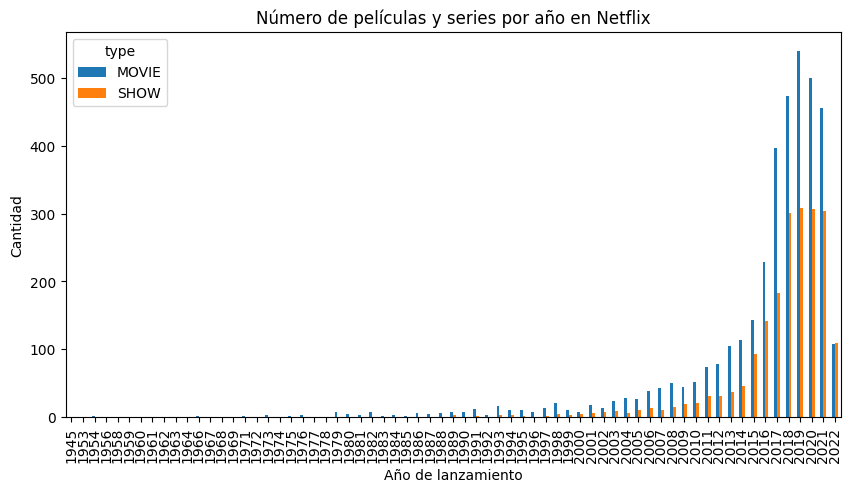



16. Película de terror más reciente:
              title  release_year production_countries
5066  The Wasteland          2022               ['ES']


17. Producciones desarrolladas en más de un país: 642


19. Estos son los cinco géneros más comunes:
1: El género drama, que contiene 2901 producciones con 1864 peliculas y 1037 series. Por lo tanto, hay más películas que series
2: El género comedy, que contiene 2269 producciones con 1543 peliculas y 726 series. Por lo tanto, hay más películas que series
3: El género thriller, que contiene 1178 producciones con 830 peliculas y 348 series. Por lo tanto, hay más películas que series
4: El género action, que contiene 1053 producciones con 641 peliculas y 412 series. Por lo tanto, hay más películas que series
5: El género romance, que contiene 958 producciones con 694 peliculas y 264 series. Por lo tanto, hay más películas que series


In [27]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

# Cargamos el dataset desde una URL pública
url = "https://raw.githubusercontent.com/amirtds/kaggle-netflix-tv-shows-and-movies/refs/heads/main/titles.csv"
netflix = pd.read_csv(url)

# BLOQUE 1
# 1. Explica qué información contiene el dataset, cuántas filas y columnas tiene, y qué representa cada una.

print()
print()
print("1. Información del dataset:")
print(netflix.info())
print("Filas x columnas: ", netflix.shape)

# 2. Calcula cuántos títulos hay de cada tipo (por ejemplo, películas o series) e interpreta el resultado.

print()
print()
print("2. Tipos de contenido:")
print(netflix.groupby("type")["title"].count())

# 3. Muestra las diez producciones más recientes junto con su país y año de estreno.

print()
print()
print("3. Producciones más recientes:")
print(netflix[["title", "release_year", "production_countries"]].sort_values("release_year", ascending=False).head(10))

# 4. Indica cuál es la producción más antigua registrada y comenta si el dato parece coherente.

print()
print()
print("4. Película más antigua registrada:")
print(netflix[["release_year", "title"]].sort_values("release_year", ascending=True).head(1))
print("Se publicó en 1945, parece tener sentido ya que la primera emisión de una película se realizó en 1895")

# 5. Muestra las producciones estrenadas en el año 2020 y cuenta cuántas hay.

print()
print()
print(f"5. Número de películas estrenadas en 2020: {(netflix["release_year"] == 2020).sum()}")

# 6. Muestra todas las producciones dirigidas por Steven Spielberg (si aparece en el dataset). --> NO hay directores
# 7. Crea un nuevo DataFrame con los títulos que contengan la palabra Love o Amor.

print()
print()
titulos_amor_love = netflix[netflix["title"].str.contains("love|amor", case=False, na=False)]

# 8. Calcula qué porcentaje del total del catálogo corresponde a producciones de Estados Unidos.

print()
print()
num_prod_usa = netflix[netflix["production_countries"].str.contains("US", na=False)]
print(f"8. El número de producciones realizadas en EEUU es de {len(num_prod_usa)}, lo que implica un {round((len(num_prod_usa) / len(netflix) * 100), 2)}% sobre el total.")

# 9. Muestra las cinco producciones con mayor duración e interpreta el resultado.

print()
print()
print(netflix[["title", "type", "description", "release_year", "runtime"]].sort_values(by="runtime", ascending=False).head(5))
print("9. En este top solamente aparecen películas con duraciones excepcionales, predominando las décadas de los 70 y los 80")

# 10. Identifica los cinco países con más títulos producidos y ordénalos de mayor a menor.

print()
print()
paises = netflix["production_countries"].str.strip("[]").str.replace(" ", "").str.replace("'", "").dropna().str.split(",")
counter_paises = Counter(paises.sum())
cantidad_por_pais = pd.DataFrame(counter_paises.items(), columns=["country", "quantity"])
print("10. Países con más producciones:")
print(cantidad_por_pais.sort_values(by="quantity", ascending=False).head(5))

# 11. Indica qué año tiene más estrenos y cuántos títulos se publicaron en ese periodo.

print()
print()
cantidad_estrenos = netflix["release_year"].value_counts()
print(f"11. El año con más estrenos fue {cantidad_estrenos.idxmax()} con {cantidad_estrenos.max()} títulos.")

# 12. Representa mediante un gráfico la evolución del número de títulos a lo largo de los años.

netflix["release_year"].value_counts().sort_index(ascending=True).plot(kind="bar", figsize=(10, 5))
plt.title("Número de películas publicadas por año")
plt.xlabel("Año")
plt.ylabel("Cantidad")
plt.show()

# 13. Crea un gráfico de barras con los diez países que más títulos han producido.

#utilizando "cantidad_por_pais", creado en el ejercicio 10, podemos sacar una tabla con la estructura pais y cantidad de la que sacar la información
cantidad_ordenada = cantidad_por_pais.sort_values(by="quantity", ascending=False)
plt.figure(figsize=(10, 5))
plt.bar(cantidad_ordenada["country"].head(), cantidad_ordenada["quantity"].head())
plt.title("Paises con más producciones")
plt.xlabel("País")
plt.ylabel("Cantidad")
plt.show()

# 14. Añade una nueva columna llamada “década” que agrupe los años de estreno (por ejemplo, 1990, 2000, 2010...)
# y analiza qué década concentra más estrenos.

print()
print()
netflix["decada"] = (netflix["release_year"] // 10) * 10
estrenos_por_decada = netflix["decada"].value_counts().sort_index()
print(f"14. La década con más estrenos fue la de {estrenos_por_decada.idxmax()} con un total de {estrenos_por_decada.max()}")

# 15. Crea una visualización que compare el número de películas y series por año.

conteo_por_año = netflix.groupby(['release_year', 'type']).size().unstack(fill_value=0)
conteo_por_año.plot(kind="bar", figsize=(10, 5))
plt.title('Número de películas y series por año en Netflix')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Cantidad')
plt.show()

# 16. Busca todas las producciones de género terror o horror y analiza cuál es la más reciente y de qué país procede.

print()
print()
peliculas_de_terror = netflix[netflix["genres"].str.contains("terror|horror", case=False, na=False)]
print("16. Película de terror más reciente:")
print(peliculas_de_terror[["title", "release_year", "production_countries"]].sort_values("release_year", ascending=False).head(1))

# 17. Calcula cuántas producciones fueron realizadas en más de un país.

print()
print()
print(f"17. Producciones desarrolladas en más de un país: {len(netflix[netflix["production_countries"].str.contains(",", na=False)])}")

# 18. Indica qué director aparece con mayor frecuencia en el conjunto de datos. --> NO hay directores

# 19. Analiza cuáles son los géneros más comunes y en qué tipo de producción predominan.

print()
print()
generos = netflix["genres"].str.strip("[]").str.replace(" ", "").str.replace("'", "").dropna().str.split(",")
counter_generos = Counter(generos.sum())
cantidad_por_genero = pd.DataFrame(counter_generos.items(), columns=["genres", "quantity"])
total_cinco_mayores_generos = cantidad_por_genero.sort_values(by="quantity", ascending=False).head(5)

peliculas = netflix[netflix["type"] == "MOVIE"]
peliculas_por_genero = peliculas["genres"].str.strip("[]").str.replace(" ", "").str.replace("'", "").dropna().str.split(",")
counter_generos_peliculas = Counter(peliculas_por_genero.sum())
cantidad_peliculas_por_genero = pd.DataFrame(counter_generos_peliculas.items(), columns=["genres", "quantity"])

peliculas_cinco_mayores_generos = cantidad_peliculas_por_genero[cantidad_peliculas_por_genero["genres"].isin(total_cinco_mayores_generos["genres"])]
peliculas_cinco_mayores_generos = peliculas_cinco_mayores_generos.rename(columns={"quantity": "movies"})

cinco_mayores_generos = pd.merge(total_cinco_mayores_generos, peliculas_cinco_mayores_generos, on="genres")
cinco_mayores_generos["shows"] = cinco_mayores_generos["quantity"] - cinco_mayores_generos["movies"]

print("19. Estos son los cinco géneros más comunes:")
for index, fila in cinco_mayores_generos.iterrows():
    genero = fila["genres"]
    total = fila["quantity"]
    peliculas = fila["movies"]
    series = fila["shows"]
    comparacion = "más" if peliculas > series else "menos"

    print(f"{index + 1}: El género {genero}, que contiene {total} producciones con {peliculas} peliculas y {series} series. Por lo tanto, hay {comparacion} películas que series")

20.

**¿Cuál es el título más largo o más corto del conjunto de datos?**

El título más corto es "H" y el más largo "Jim & Andy: The Great Beyond - Featuring a Very Special, Contractually Obligated Mention of Tony Clifton"

**¿Existen títulos repetidos?**

Sí, existen 52 títulos repetidos

**¿Qué país produce más comedias o dramas?**

En ambos casos, el país con más producciones es Estados Unidos.

**¿Hay algún patrón interesante en los años de estreno o en los géneros?**

A lo largo de los años, la cantidad de producciones aumenta hasta la llegada de la pandemia, que hace que las producciones de 2022 se reduzcan considerablemente.



### Fin del Notebook
